Work on the ScalarField and VectorField to reconstruct the Ohm'law terms
========================================================================

In [1]:
import sys
import os
sys.path.append("/home/smets/codes/far/PHARE/pyphare/")
import pyphare
import matplotlib.pyplot as plt
from pyphare.pharesee.run import Run
from pyphare.core.operators import dot, cross, sqrt, modulus, grad
from pyphare.pharesee.hierarchy import rename
import numpy as np
%matplotlib inline

In [2]:
# run_path = "/DATA/phare/harris/tiny" # Tiny Harris run on kaa
run_path = "/home/smets/codes/far/farMe/Harris/tiny/run"
os.listdir(run_path)

['checks',
 '.log',
 '__pycache__',
 'EM_B.h5',
 'EM_E.h5',
 'harris.py',
 'ions_bulkVelocity.h5',
 'ions_density.h5',
 'ions_mass_density.h5',
 'ions_pop_protons_density.h5',
 'ions_pop_protons_domain.h5',
 'ions_pop_protons_flux.h5',
 'job.sh']

In [3]:
run  = Run(run_path)
time = 0.0

# All the possible `ScalarField`

In [4]:
N = run.GetNi(time)
P = run.GetPe(time)  # , all_primal=True)
type(P)

pyphare.pharesee.hierarchy.ScalarField

In [5]:
for ilvl, lvl in N.levels(time).items():
    for patch in lvl.patches:
        names = list(patch.patch_datas.keys())
        print('names      : {}'.format(names))
        print("id         : {}".format(patch.id))
        print("box        : {}".format(patch.patch_datas[list(patch.patch_datas.keys())[0]].box))
        for name in names:
            pdata = patch.patch_datas[name]
            # print("name       : {}".format(name))
            print("size [{}]  : {}   -   {}".format(name, pdata.size, pdata.centerings))
        print(" --- ")
        break

names      : ['value']
id         : p0#0
box        : Box([0, 0],[57, 57])
size [value]  : [63 63]   -   ['primal', 'primal']
 --- 


(<Figure size 640x480 with 2 Axes>, <AxesSubplot: xlabel='x', ylabel='y'>)

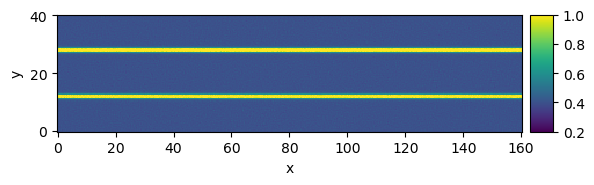

In [6]:
N.plot(qty='value', vmin=0.2, vmax=1.0, cmap='viridis')

In [7]:
r = -grad(P)/N
s = 2.0*P
t = P+N

In [ ]:
v = run.GetVi(time)
b = run.GetB(time, all_primal=False)
type(b)

In [ ]:
v.get_names()

In [ ]:
for ilvl, lvl in v.levels(time).items():
    for patch in lvl.patches:
        names = list(patch.patch_datas.keys())
        print('names      : {}'.format(names))
        print("id         : {}".format(patch.id))
        print("box        : {}".format(patch.patch_datas[list(patch.patch_datas.keys())[0]].box))
        for name in names:
            pdata = patch.patch_datas[name]
            # print("name       : {}".format(name))
            print("size [{}]  : {}   -   {}".format(name, pdata.size, pdata.centerings))
        print(" --- ")
        break

In [ ]:
w = dot(v, v)

In [ ]:
type(v)

In [ ]:
for ilvl, lvl in v.levels(time).items():
    for patch in lvl.patches:
        names = list(patch.patch_datas.keys())
        print('names      : {}'.format(names))
        print("id         : {}".format(patch.id))
        print("box        : {}".format(patch.patch_datas[list(patch.patch_datas.keys())[0]].box))
        for name in names:
            pdata = patch.patch_datas[name]
            # print("name       : {}".format(name))
            print("size [{}]  : {}   -   {}".format(name, pdata.size, pdata.centerings))
        print(" --- ")
        break

In [ ]:
b.plot(qty='Bx',
       # vmin=-1.2,
       # vmax=1.2,
       cmap='viridis')

In [ ]:
B = run.GetB(time, all_primal=True)
type(B)

In [ ]:
for ilvl, lvl in B.levels(time).items():
    for patch in lvl.patches:
        names = list(patch.patch_datas.keys())
        print('names      : {}'.format(names))
        print("id         : {}".format(patch.id))
        print("box        : {}".format(patch.patch_datas[list(patch.patch_datas.keys())[0]].box))
        for name in names:
            pdata = patch.patch_datas[name]
            print("size [{}]  : {}   -   {}".format(name, pdata.size, pdata.centerings))
        print(" --- ")
        break

In [ ]:
B.plot(qty='x',
       # vmin=-1.2,
       # vmax=1.2,
       cmap='viridis')

In [ ]:
c = dot(B, B)

In [ ]:
d = sqrt(c)

In [ ]:
d.plot(qty='value',
       # vmin=0.,
       # vmax=1.,
       cmap='viridis')

In [ ]:
d.value.plot(
       # vmin=0.,
       # vmax=1.,
       cmap='viridis')

In [ ]:
B.x

In [ ]:
e = modulus(B)

In [ ]:
e.plot(qty='value',
       # vmin=0.,
       # vmax=1.,
       cmap='viridis')

In [ ]:
e = 2*B

In [ ]:
e.plot(qty='x',
       # vmin=-2.2,
       # vmax=2.2,
       cmap='viridis')

In [ ]:
f=B*2

In [ ]:
type(f)

In [ ]:
E = run.GetE(time, all_primal=True)

In [ ]:
g = cross(E, B)

In [ ]:
g.plot(qty='z',
       # vmin=-0.02,
       # vmax=0.02,
       cmap='viridis')

In [ ]:
i = -B

In [ ]:
i.plot(qty='x',
       # vmin=-0.02,
       # vmax=0.02,
       cmap='viridis')

In [ ]:
N = run.GetNi(time)

In [ ]:
type(N)
N.quantities()
N.value

In [ ]:
for ilvl, lvl in N.levels(time).items():
    for patch in lvl.patches:
        names = list(patch.patch_datas.keys())
        print('names      : {}'.format(names))
        print("id         : {}".format(patch.id))
        print("box        : {}".format(patch.patch_datas[list(patch.patch_datas.keys())[0]].box))
        for name in names:
            pdata = patch.patch_datas[name]
            # print("name       : {}".format(name))
            print("size [{}]  : {}   -   {}".format(name, pdata.size, pdata.centerings))
        print(" --- ")
        break

In [ ]:
j = B/(N*10)

In [ ]:
B

In [ ]:
j.quantities()

In [ ]:
(10*B).quantities()

In [ ]:
j.plot(qty='x',
       # vmin=-0.2,
       # vmax=0.2,
       cmap='viridis')

In [ ]:
P = run.GetPe(time, all_primal=True)

In [ ]:
P.plot(qty='value',
       #  vmin=0.4,
       #vmax=1.2,
       cmap='viridis')

In [ ]:
q = grad(P)

In [ ]:
type(q)

In [ ]:
q.plot(qty='y',
       # vmin=-0.1,
       # vmax=+0.1,
       cmap='viridis')

In [ ]:
r = grad(P)/N

In [ ]:
N.quantities()

In [ ]:
r.plot(qty='y',
       # vmin=-0.1,
       # vmax=+0.1,
       cmap='viridis')

In [ ]:
# rho = run.GetMassDensity(time)
e = run.GetE(time); print(type(e))
b = run.GetB(time); print(type(b))
r = run.GetNi(time); print(type(r))
n = run.GetN(time, "protons"); print(type(n))
v = run.GetVi(time); print(type(v))
F = run.GetFlux(time, "protons"); print(type(F))
j = run.GetJ(time); print(type(j))

In [ ]:
N+N

In [ ]:
import h5py
# f=h5py.File(os.path.join(run_path, 'EM_B.h5'), 'r')
f=h5py.File(os.path.join(run_path, 'ions_density.h5'), 'r')
print(list(f.attrs))
# print(list(f['t'].keys()))
# print(list(f['t']['2.0000000000'].keys()))
print(list(f))
print(list(f['py_attrs'].attrs.items()))
# print(f['t'].values())